# Participant ID:S08

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [47]:
## Read the CSV file into a DataFrame
S08_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S08_final_df.csv'

S08_df = pd.read_csv(S08_path, index_col=False, parse_dates=['DateTime'])

In [48]:
S08_df.head

<bound method NDFrame.head of                  DateTime ID_instance     hrv_vlf      hrv_lf      hrv_hf  \
0     2023-07-31 12:58:39       S08_1   75.442870  227.553105  297.935567   
1     2023-07-31 12:58:40       S08_1   75.293002  227.544864  298.014385   
2     2023-07-31 12:58:41       S08_1   75.143135  227.536624  298.093202   
3     2023-07-31 12:58:42       S08_1   74.993267  227.528384  298.172020   
4     2023-07-31 12:58:43       S08_1   74.843400  227.520143  298.250837   
...                   ...         ...         ...         ...         ...   
19656 2023-08-11 12:57:50      S08_25  484.589098  425.864450  139.223243   
19657 2023-08-11 12:57:51      S08_25  484.589098  425.864450  139.223243   
19658 2023-08-11 12:57:52      S08_25  484.589098  425.864450  139.223243   
19659 2023-08-11 12:57:53      S08_25  484.589098  425.864450  139.223243   
19660 2023-08-11 12:57:54      S08_25  484.589098  425.864450  139.223243   

        hrv_sdnn  hrv_rmssd  hrv_mean_nni  hr

In [49]:
# Set 'DateTime' column as the index
S08_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S08_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Temp(C)_N1_min', 'Temp(C)_N1_max', 'Temp(C)_N1_avg',
                                            'RH(%)_N1_min', 'RH(%)_N1_max', 'RH(%)_N1_avg'])

# Print the results as a table
print(results_df)

   ID_instance          Start Time            End Time        Duration  \
0        S08_1 2023-07-31 12:58:39 2023-07-31 13:08:32 0 days 00:09:53   
1       S08_10 2023-08-02 19:11:59 2023-08-02 19:28:53 0 days 00:16:54   
2       S08_11 2023-08-03 07:28:31 2023-08-03 07:38:04 0 days 00:09:33   
3       S08_12 2023-08-03 11:05:38 2023-08-03 11:15:56 0 days 00:10:18   
4       S08_13 2023-08-03 12:32:20 2023-08-03 12:43:22 0 days 00:11:02   
5       S08_14 2023-08-03 17:21:04 2023-08-03 17:30:58 0 days 00:09:54   
6       S08_15 2023-08-04 07:26:54 2023-08-04 07:38:02 0 days 00:11:08   
7       S08_16 2023-08-04 22:25:56 2023-08-04 22:36:14 0 days 00:10:18   
8       S08_17 2023-08-07 18:22:46 2023-08-07 18:30:46 0 days 00:08:00   
9       S08_18 2023-08-08 07:17:57 2023-08-08 07:27:45 0 days 00:09:48   
10      S08_19 2023-08-08 16:45:09 2023-08-08 16:54:06 0 days 00:08:57   
11       S08_2 2023-07-31 16:53:06 2023-07-31 17:09:04 0 days 00:15:58   
12      S08_20 2023-08-09 07:20:15 202

In [5]:
# Group by 'id_instance' and calculate time duration
time_duration = S08_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S08_1      9.88
S08_10    16.90
S08_11     9.55
S08_12    10.30
S08_13    11.03
S08_14     9.90
S08_15    11.13
S08_16    10.30
S08_17     8.00
S08_18     9.80
S08_19     8.95
S08_2     15.97
S08_20     8.93
S08_21    11.70
S08_22    12.40
S08_23    10.70
S08_24    10.23
S08_25     9.53
S08_3     19.20
S08_4     10.82
S08_5     10.97
S08_6      8.45
S08_7     55.37
S08_8     11.12
S08_9     15.73
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_21872\1156586860.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S08_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [ ]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S08_df.drop(S08_df[S08_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [6]:
S08_df.isnull().sum()

ID_instance          24
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [7]:
S08_df.dropna(subset=['ID_instance'], inplace=True)

In [8]:
S08_df['ID_instance'].unique()

array(['S08_1', 'S08_2', 'S08_3', 'S08_4', 'S08_5', 'S08_6', 'S08_7',
       'S08_8', 'S08_9', 'S08_10', 'S08_11', 'S08_12', 'S08_13', 'S08_14',
       'S08_15', 'S08_16', 'S08_17', 'S08_18', 'S08_19', 'S08_20',
       'S08_21', 'S08_22', 'S08_23', 'S08_24', 'S08_25'], dtype=object)

In [9]:
S08_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [10]:
# Drop columns starting with 'acc_'
S08_df = S08_df.filter(regex='^(?!acc_)')

In [11]:
S08_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [12]:
S08_df.columns[18:30]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### Correlation matrix

In [13]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S08_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S08_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S08_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.145756,-0.046093,0.068956,0.151107,-0.157062,-0.078135,0.148625,-0.137508,-0.067959,0.156322,-0.125179,-0.081630
hrv_lf,-0.093859,0.118807,-0.179208,-0.076327,-0.137638,-0.348011,-0.078300,-0.071979,-0.333315,-0.084813,-0.058882,-0.418428
hrv_hf,-0.258594,-0.074783,-0.466870,-0.290551,-0.164805,-0.440902,-0.249311,-0.066559,-0.431964,-0.260843,-0.049146,-0.443696
hrv_sdnn,-0.091187,-0.155296,-0.323948,-0.101395,-0.368114,-0.405904,-0.081204,-0.209831,-0.381565,-0.084532,-0.183765,-0.424620
hrv_rmssd,-0.196231,-0.329467,-0.497585,-0.218965,-0.362183,-0.355510,-0.190070,-0.166914,-0.332198,-0.200679,-0.150852,-0.333347
hrv_mean_nni,0.008343,-0.256438,-0.240462,-0.022777,-0.369172,-0.230352,0.013596,-0.256396,-0.194032,-0.002378,-0.227758,-0.299450
hrv_median_nni,0.020807,-0.272903,-0.227059,-0.015328,-0.367965,-0.210804,0.023922,-0.262475,-0.175208,0.008775,-0.234023,-0.281445
hrv_range_nni,-0.029262,-0.314749,-0.251786,-0.060243,-0.361006,-0.215500,-0.031477,-0.213381,-0.188990,-0.016742,-0.187527,-0.191236
hrv_entropy,0.301685,-0.058614,0.354988,0.331924,-0.131429,0.186172,0.311122,-0.177144,0.188548,0.331064,-0.178103,0.208581
eda_tonic_mean,0.101896,-0.043399,0.129350,0.129430,-0.024935,0.200222,0.094484,0.064454,0.218996,0.064088,0.031894,0.212306


### Correlation heatmap

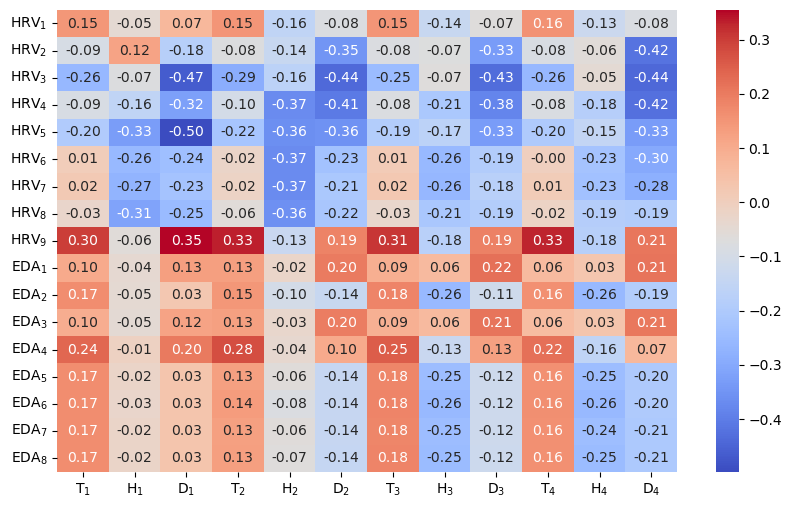

In [14]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S08')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S08_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S08_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [15]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S08_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S08_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S08_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S08_df['Temp(C)_N1'].quantile(0.30), S08_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S08_df['RH(%)_N1'].quantile(0.30), S08_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S08_df['lambda'] = S08_df.apply(comfort_label, axis=1)
label_counts = S08_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S08.pkl'
S08_df.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_rmssd
EDA Variable: eda_tonic_energy
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.0    69.501451
0.5    30.473087
1.0     0.025462
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_21872\2435864047.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S08_df['lambda'] = S08_df.apply(comfort_label, axis=1)


In [16]:
# Group by unique instances
instance_groups = S08_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


ID_instance
S08_1     0.037879
S08_10    0.000000
S08_11    0.000000
S08_12    0.074313
S08_13    0.000000
S08_14    0.000000
S08_15    0.000000
S08_16    0.000000
S08_17    0.206861
S08_18    0.000000
S08_19    0.500000
S08_2     0.000000
S08_20    0.205773
S08_21    0.000000
S08_22    0.453691
S08_23    0.000000
S08_24    0.000000
S08_25    0.000000
S08_3     0.307025
S08_4     0.000000
S08_5     0.000000
S08_6     0.000000
S08_7     0.393470
S08_8     0.000000
S08_9     0.476190
Name: lambda, dtype: float64


### Weather Station Data (During Commuting):

In [19]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


,Data,Relative Humidity Min (%),Relative Humidity Ave (%),Relative Humidity Max (%),Relative Humidity StDev (%),Air Temperature Min ('C),Air Temperature Ave ('C),Air Temperature Max ('C),Air Temperature StDev ('C),Solar Radiation Min (W/m2),...,Wind direction PrevDir (>),Wind direction RisDir (>),Wind direction RisVel (m/s),Wind direction StdDevDir (>),Wind direction CalmPerc (%),Wind speed Min (m/s),Wind speed Ave (m/s),Wind speed Max (m/s),Wind speed StDev (m/s),Rainfall Tot (mm)
0,2023-07-01 00:00:00,99.40,99.41,99.42,0.0,15.50,15.60,15.69,0.0,0.0,...,298,290,1.0,53,6,0.0,1.3,3.0,0.6,0.0
1,2023-07-01 00:10:00,99.40,99.41,99.41,0.0,15.55,15.65,15.74,0.0,0.0,...,165,155,0.5,69,25,0.0,0.8,1.9,0.5,0.2
2,2023-07-01 00:20:00,99.40,99.41,99.42,0.0,15.60,15.67,15.74,0.0,0.0,...,296,296,0.8,29,29,0.0,0.7,1.5,0.5,0.0
3,2023-07-01 00:30:00,99.40,99.41,99.42,0.0,15.55,15.64,15.75,0.0,0.0,...,333,336,0.6,69,17,0.0,0.8,2.6,0.6,0.0
4,2023-07-01 00:40:00,99.39,99.40,99.40,0.0,15.46,15.51,15.58,0.0,0.0,...,327,324,1.6,20,3,0.0,1.6,2.6,0.6,0.0


In [20]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S08_1", "Start Time" : "2023-07-31 12:58:39", "End Time": "2023-07-31 13:08:32"},
    {"ID_instance": "S08_2", "Start Time" : "2023-07-31 16:53:06", "End Time": "2023-07-31 17:09:04"},
    {"ID_instance": "S08_3", "Start Time" : "2023-07-31 18:49:49", "End Time": "2023-07-31 19:09:01"},
    {"ID_instance": "S08_4", "Start Time" : "2023-08-01 07:24:57", "End Time": "2023-08-01 07:35:46"},
    {"ID_instance": "S08_5", "Start Time" : "2023-08-01 17:08:26", "End Time": "2023-08-01 17:19:24"},
    {"ID_instance": "S08_6", "Start Time" : "2023-08-01 17:42:13", "End Time": "2023-08-01 17:50:40"},
    {"ID_instance": "S08_7", "Start Time" : "2023-08-01 17:56:46", "End Time": "2023-08-01 18:52:08"},
    {"ID_instance": "S08_8", "Start Time" : "2023-08-02 16:18:30", "End Time": "2023-08-02 16:29:37"},
    {"ID_instance": "S08_9", "Start Time" : "2023-08-02 17:36:20", "End Time": "2023-08-02 17:52:04"},
    {"ID_instance": "S08_10", "Start Time": "2023-08-02 19:11:59", "End Time": "2023-08-02 19:28:53"},
    {"ID_instance": "S08_11", "Start Time": "2023-08-03 07:28:31", "End Time": "2023-08-03 07:38:04"},
    {"ID_instance": "S08_12", "Start Time": "2023-08-03 11:05:38", "End Time": "2023-08-03 11:15:56"},
    {"ID_instance": "S08_13", "Start Time": "2023-08-03 12:32:20", "End Time": "2023-08-03 12:43:22"},
    {"ID_instance": "S08_14", "Start Time": "2023-08-03 17:21:04", "End Time": "2023-08-03 17:30:58"},
    {"ID_instance": "S08_15", "Start Time": "2023-08-04 07:26:54", "End Time": "2023-08-04 07:38:02"},
    {"ID_instance": "S08_16", "Start Time": "2023-08-04 22:25:56", "End Time": "2023-08-04 22:36:14"},
    {"ID_instance": "S08_17", "Start Time": "2023-08-07 18:22:46", "End Time": "2023-08-07 18:30:46"},
    {"ID_instance": "S08_18", "Start Time": "2023-08-08 07:17:57", "End Time": "2023-08-08 07:27:45"},
    {"ID_instance": "S08_19", "Start Time": "2023-08-08 16:45:09", "End Time": "2023-08-08 16:54:06"},
    {"ID_instance": "S08_20", "Start Time": "2023-08-09 07:20:15", "End Time": "2023-08-09 07:29:11"},
    {"ID_instance": "S08_21", "Start Time": "2023-08-09 16:06:52", "End Time": "2023-08-09 16:18:34"},
    {"ID_instance": "S08_22", "Start Time": "2023-08-10 06:57:30", "End Time": "2023-08-10 07:09:54"},
    {"ID_instance": "S08_23", "Start Time": "2023-08-11 07:03:59", "End Time": "2023-08-11 07:14:41"},
    {"ID_instance": "S08_24", "Start Time": "2023-08-11 11:17:10", "End Time": "2023-08-11 11:27:24"},
    {"ID_instance": "S08_25", "Start Time": "2023-08-11 12:48:22", "End Time": "2023-08-11 12:57:54"}


]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


,ID_instance,Start Time,End Time
0,S02_1,2023-07-31 12:58:39,2023-07-31 13:08:32
1,S02_2,2023-07-31 16:53:06,2023-07-31 17:09:04
2,S02_3,2023-07-31 18:49:49,2023-07-31 19:09:01
3,S02_4,2023-08-01 07:24:57,2023-08-01 07:35:46
4,S02_5,2023-08-01 17:08:26,2023-08-01 17:19:24


In [21]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,ID_instance,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,S02_1,29.23,30.78,29.780000,31.00,33.10,32.330000,1076.070000
1,S02_2,31.11,31.66,31.420000,28.17,29.34,28.780000,414.810000
2,S02_3,29.20,30.29,29.745000,32.87,37.67,34.955000,106.495000
3,S02_4,21.00,21.58,21.250000,66.45,69.23,67.710000,170.020000
4,S02_5,29.23,29.74,29.510000,36.94,38.43,37.690000,313.320000
5,S02_6,28.63,28.85,28.710000,39.84,40.54,40.250000,258.680000
6,S02_7,27.80,28.67,28.306667,37.51,40.57,39.221667,251.651667
7,S02_8,31.13,31.91,31.480000,31.78,33.81,32.750000,719.360000
8,S02_9,30.03,30.84,30.475000,35.02,38.98,37.140000,393.905000
9,S02_10,28.60,28.82,28.700000,43.69,44.25,44.000000,78.410000


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [22]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ("2023-07-31 08:00:00", "2023-07-31 18:00:00"),
    ("2023-08-01 08:00:00", "2023-08-01 18:00:00"),
    ("2023-08-02 08:00:00", "2023-08-02 18:00:00"),
    ("2023-08-03 08:00:00", "2023-08-03 18:00:00"),
    ("2023-08-04 08:00:00", "2023-08-04 18:00:00"),
    ("2023-08-07 08:00:00", "2023-08-07 18:00:00"),
    ("2023-08-08 08:00:00", "2023-08-08 18:00:00"),
    ("2023-08-09 08:00:00", "2023-08-09 18:00:00"),
    ("2023-08-10 08:00:00", "2023-08-10 18:00:00"),
    ("2023-08-11 08:00:00", "2023-08-11 18:00:00")
]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


,Date Range,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,2023-07-31 08:00:00 to 2023-07-31 18:00:00,21.59,32.85,28.886557,25.55,59.83,36.206393,710.517049
1,2023-08-01 08:00:00 to 2023-08-01 18:00:00,21.86,30.87,27.803279,33.27,65.16,45.536721,590.019180
2,2023-08-02 08:00:00 to 2023-08-02 18:00:00,21.51,32.50,28.056230,29.91,75.34,44.900328,754.557049
3,2023-08-03 08:00:00 to 2023-08-03 18:00:00,21.74,31.17,28.050164,42.64,77.74,53.510492,733.048525
4,2023-08-04 08:00:00 to 2023-08-04 18:00:00,17.52,27.29,22.772623,57.25,99.41,78.601475,316.800984
5,2023-08-07 08:00:00 to 2023-08-07 18:00:00,17.93,27.72,24.161803,19.34,65.61,40.487377,786.051639
6,2023-08-08 08:00:00 to 2023-08-08 18:00:00,16.95,29.23,25.329672,11.19,60.22,26.454590,802.498361
7,2023-08-09 08:00:00 to 2023-08-09 18:00:00,19.21,29.78,25.980492,20.05,55.21,30.910000,748.205574
8,2023-08-10 08:00:00 to 2023-08-10 18:00:00,19.40,31.70,27.231967,26.19,62.08,37.206393,710.445738
9,2023-08-11 08:00:00 to 2023-08-11 18:00:00,20.73,31.15,28.197377,33.60,66.78,42.484918,700.647049


### Living Lab (Day of Commuting from 8am to 6pm):

In [23]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-07-31 08:00:00", "2023-07-31 18:00:00"),
    ("2023-08-01 08:00:00", "2023-08-01 18:00:00"),
    ("2023-08-02 08:00:00", "2023-08-02 18:00:00"),
    ("2023-08-03 08:00:00", "2023-08-03 18:00:00"),
    ("2023-08-04 08:00:00", "2023-08-04 18:00:00"),
    ("2023-08-07 08:00:00", "2023-08-07 18:00:00"),
    ("2023-08-08 08:00:00", "2023-08-08 18:00:00"),
    ("2023-08-09 08:00:00", "2023-08-09 18:00:00"),
    ("2023-08-10 08:00:00", "2023-08-10 18:00:00"),
    ("2023-08-11 08:00:00", "2023-08-11 18:00:00")
    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity
0,2023-07-31 08:00:00,2023-07-31 18:00:00,25.1,27.1,25.636106,25.5,27.3,25.976040,56.4,62.7,61.034775
1,2023-08-01 08:00:00,2023-08-01 18:00:00,23.3,26.7,25.001997,23.7,26.8,25.369551,56.7,67.6,62.628120
2,2023-08-02 08:00:00,2023-08-02 18:00:00,22.9,26.4,24.144260,23.4,26.6,24.563894,58.0,68.3,64.649085
3,2023-08-03 08:00:00,2023-08-03 18:00:00,24.6,26.5,25.186689,24.9,26.6,25.525458,60.2,69.0,65.729784
4,2023-08-04 08:00:00,2023-08-04 18:00:00,24.5,26.3,25.119634,24.8,26.3,25.417637,64.4,69.7,67.497338
5,2023-08-07 08:00:00,2023-08-07 18:00:00,23.9,25.7,24.935275,24.1,25.9,25.158236,43.8,59.9,55.697504
6,2023-08-08 08:00:00,2023-08-08 18:00:00,25.5,26.1,25.826622,25.6,26.2,25.989018,39.3,53.4,46.259068
7,2023-08-09 08:00:00,2023-08-09 18:00:00,25.4,26.2,25.953910,25.6,26.4,26.096007,42.6,49.4,45.805491
8,2023-08-10 08:00:00,2023-08-10 18:00:00,25.7,26.9,26.235774,25.8,27.1,26.393344,48.0,51.9,49.880366
9,2023-08-11 08:00:00,2023-08-11 18:00:00,25.9,26.7,26.362729,26.1,26.8,26.524958,53.3,55.1,54.238103


# Living Lab (Before arrivel and after arrivel)

In [12]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-07-31 12:58:39", "2023-07-31 13:08:32"),
    ("2023-07-31 16:53:06", "2023-07-31 17:09:04"),
    ("2023-07-31 18:49:49", "2023-07-31 19:09:01"),
    ("2023-08-01 07:24:57", "2023-08-01 07:35:46"),
    ("2023-08-01 17:08:26", "2023-08-01 17:19:24"),
    ("2023-08-01 17:42:13", "2023-08-01 17:50:40"),
    ("2023-08-01 17:56:46", "2023-08-01 18:52:08"),
    ("2023-08-02 16:18:30", "2023-08-02 16:29:37"),
    ("2023-08-02 17:36:20", "2023-08-02 17:52:04"),
    ("2023-08-02 19:11:59", "2023-08-02 19:28:53"),
    ("2023-08-03 07:28:31", "2023-08-03 07:38:04"),
    ("2023-08-03 11:05:38", "2023-08-03 11:15:56"),
    ("2023-08-03 12:32:20", "2023-08-03 12:43:22"),
    ("2023-08-03 17:21:04", "2023-08-03 17:30:58"),
    ("2023-08-04 07:26:54", "2023-08-04 07:38:02"),
    ("2023-08-04 22:25:56", "2023-08-04 22:36:14"),
    ("2023-08-07 18:22:46", "2023-08-07 18:30:46"),
    ("2023-08-08 07:17:57", "2023-08-08 07:27:45"),
    ("2023-08-08 16:45:09", "2023-08-08 16:54:06"),
    ("2023-08-09 07:20:15", "2023-08-09 07:29:11"),
    ("2023-08-09 16:06:52", "2023-08-09 16:18:34"),
    ("2023-08-10 06:57:30", "2023-08-10 07:09:54"),
    ("2023-08-11 07:03:59", "2023-08-11 07:14:41"),
    ("2023-08-11 11:17:10", "2023-08-11 11:27:24"),
    ("2023-08-11 12:48:22", "2023-08-11 12:57:54")

    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity
0,2023-07-31 12:58:39,2023-07-31 13:08:32,25.4,25.4,25.400000,25.8,25.8,25.800000,62.4,62.5,62.440000
1,2023-07-31 16:53:06,2023-07-31 17:09:04,25.2,25.2,25.200000,25.5,25.5,25.500000,61.8,62.0,61.931250
2,2023-07-31 18:49:49,2023-07-31 19:09:01,25.0,25.3,25.120000,25.4,25.7,25.475000,61.3,62.2,61.905000
3,2023-08-01 07:24:57,2023-08-01 07:35:46,26.3,26.4,26.309091,26.5,26.6,26.572727,57.9,58.2,58.027273
4,2023-08-01 17:08:26,2023-08-01 17:19:24,23.4,23.6,23.472727,23.9,24.0,23.927273,67.2,67.6,67.445455
5,2023-08-01 17:42:13,2023-08-01 17:50:40,23.3,23.4,23.350000,23.8,23.9,23.837500,67.1,67.2,67.137500
6,2023-08-01 17:56:46,2023-08-01 18:52:08,23.3,24.2,23.794643,23.7,24.6,24.278571,64.6,67.1,65.814286
7,2023-08-02 16:18:30,2023-08-02 16:29:37,23.3,23.9,23.563636,23.8,24.4,24.100000,67.6,68.3,67.981818
8,2023-08-02 17:36:20,2023-08-02 17:52:04,24.8,25.2,25.025000,25.3,25.7,25.525000,63.0,64.2,63.468750
9,2023-08-02 19:11:59,2023-08-02 19:28:53,25.2,25.3,25.241176,25.4,25.4,25.400000,62.3,63.0,62.558824


In [14]:
import pandas as pd
from datetime import datetime, timedelta

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S08_1", "Start Time": "2023-07-31 12:58:39", "End Time": "2023-07-31 13:08:32"},
    {"ID_instance": "S08_4", "Start Time": "2023-08-01 07:24:57", "End Time": "2023-08-01 07:35:46"},
    {"ID_instance": "S08_11", "Start Time": "2023-08-03 07:28:31", "End Time": "2023-08-03 07:38:04"},
    {"ID_instance": "S08_12", "Start Time": "2023-08-03 11:05:38", "End Time": "2023-08-03 11:15:56"},
    {"ID_instance": "S08_13", "Start Time": "2023-08-03 12:32:20", "End Time": "2023-08-03 12:43:22"},
    {"ID_instance": "S08_15", "Start Time": "2023-08-04 07:26:54", "End Time": "2023-08-04 07:38:02"},
    {"ID_instance": "S08_18", "Start Time": "2023-08-08 07:17:57", "End Time": "2023-08-08 07:27:45"},
    {"ID_instance": "S08_20", "Start Time": "2023-08-09 07:20:15", "End Time": "2023-08-09 07:29:11"},
    {"ID_instance": "S08_22", "Start Time": "2023-08-10 06:57:30", "End Time": "2023-08-10 07:09:54"},
    {"ID_instance": "S08_23", "Start Time": "2023-08-11 07:03:59", "End Time": "2023-08-11 07:14:41"},
    {"ID_instance": "S08_24", "Start Time": "2023-08-11 11:17:10", "End Time": "2023-08-11 11:27:24"},
    {"ID_instance": "S08_25", "Start Time": "2023-08-11 12:48:22", "End Time": "2023-08-11 12:57:54"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Initialize lists to store results
before_results_list = []
after_results_list = []

# Process each commuting instance
for instance in commuting_instances:
    start_time = instance["Start Time"]
    end_time = instance["End Time"]
    one_hour_before = start_time - timedelta(hours=1)
    one_hour_after = end_time + timedelta(hours=1)
    
    # Filter data for one hour before the start time
    before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
    
    # Calculate required metrics for before one hour
    before_result = {
        'ID_instance': instance["ID_instance"],
        'Time_Interval': 'Before',
        'Start_Time': one_hour_before,
        'End_Time': start_time,
        'Min_Temp_Air': before_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': before_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': before_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': before_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': before_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': before_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': before_data['RH(%)'].min(),
        'Max_Relative_Humidity': before_data['RH(%)'].max(),
        'Mean_Relative_Humidity': before_data['RH(%)'].mean(),
    }
    
    # Append result to the before results list
    before_results_list.append(before_result)
    
    # Filter data for one hour after the end time
    after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]
    
    # Calculate required metrics for after one hour
    after_result = {
        'ID_instance': instance["ID_instance"],
        'Time_Interval': 'After',
        'Start_Time': end_time,
        'End_Time': one_hour_after,
        'Min_Temp_Air': after_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': after_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': after_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': after_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': after_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': after_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': after_data['RH(%)'].min(),
        'Max_Relative_Humidity': after_data['RH(%)'].max(),
        'Mean_Relative_Humidity': after_data['RH(%)'].mean(),
    }
    
    # Append result to the after results list
    after_results_list.append(after_result)

# Create DataFrames from the results lists
before_results_df = pd.DataFrame(before_results_list)
after_results_df = pd.DataFrame(after_results_list)


before_results_df, after_results_df


(   ID_instance Time_Interval          Start_Time            End_Time  \
 0        S08_1        Before 2023-07-31 11:58:39 2023-07-31 12:58:39   
 1        S08_4        Before 2023-08-01 06:24:57 2023-08-01 07:24:57   
 2       S08_11        Before 2023-08-03 06:28:31 2023-08-03 07:28:31   
 3       S08_12        Before 2023-08-03 10:05:38 2023-08-03 11:05:38   
 4       S08_13        Before 2023-08-03 11:32:20 2023-08-03 12:32:20   
 5       S08_15        Before 2023-08-04 06:26:54 2023-08-04 07:26:54   
 6       S08_18        Before 2023-08-08 06:17:57 2023-08-08 07:17:57   
 7       S08_20        Before 2023-08-09 06:20:15 2023-08-09 07:20:15   
 8       S08_22        Before 2023-08-10 05:57:30 2023-08-10 06:57:30   
 9       S08_23        Before 2023-08-11 06:03:59 2023-08-11 07:03:59   
 10      S08_24        Before 2023-08-11 10:17:10 2023-08-11 11:17:10   
 11      S08_25        Before 2023-08-11 11:48:22 2023-08-11 12:48:22   
 
     Min_Temp_Air  Max_Temp_Air  Avg_Temp_Air  Mi

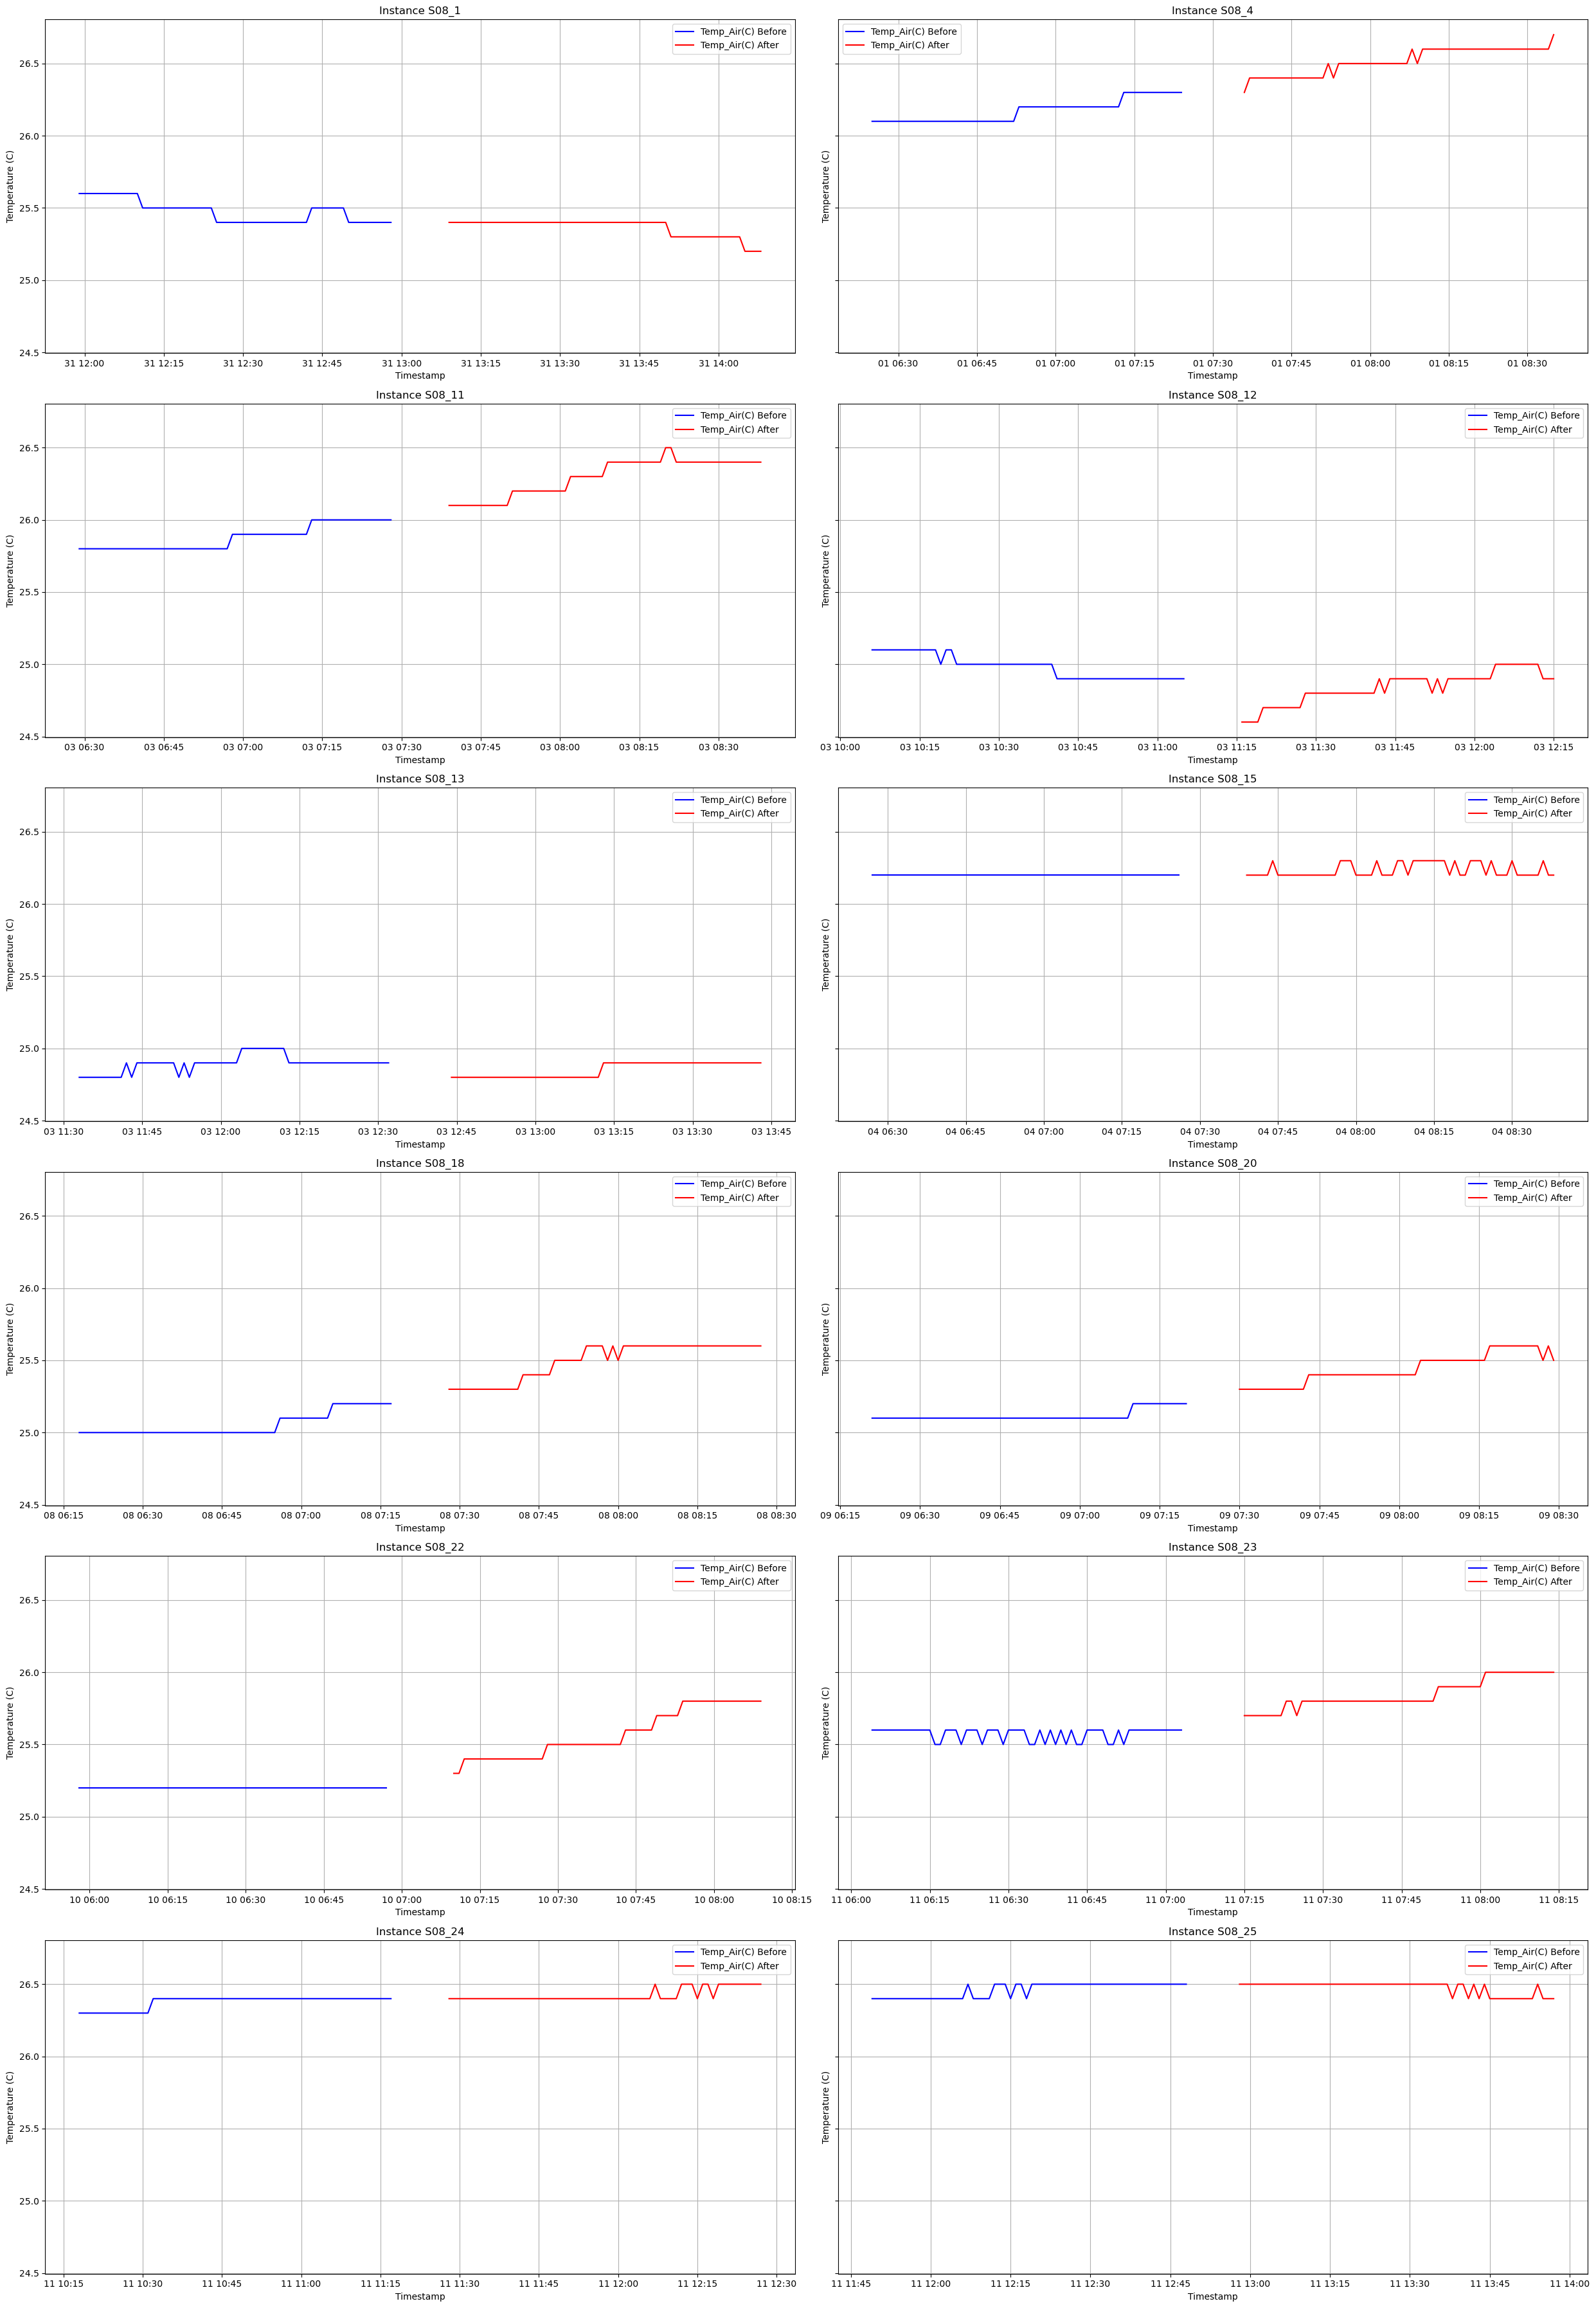

In [50]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S08_1", "Start Time": "2023-07-31 12:58:39", "End Time": "2023-07-31 13:08:32"},
    {"ID_instance": "S08_4", "Start Time": "2023-08-01 07:24:57", "End Time": "2023-08-01 07:35:46"},
    {"ID_instance": "S08_11", "Start Time": "2023-08-03 07:28:31", "End Time": "2023-08-03 07:38:04"},
    {"ID_instance": "S08_12", "Start Time": "2023-08-03 11:05:38", "End Time": "2023-08-03 11:15:56"},
    {"ID_instance": "S08_13", "Start Time": "2023-08-03 12:32:20", "End Time": "2023-08-03 12:43:22"},
    {"ID_instance": "S08_15", "Start Time": "2023-08-04 07:26:54", "End Time": "2023-08-04 07:38:02"},
    {"ID_instance": "S08_18", "Start Time": "2023-08-08 07:17:57", "End Time": "2023-08-08 07:27:45"},
    {"ID_instance": "S08_20", "Start Time": "2023-08-09 07:20:15", "End Time": "2023-08-09 07:29:11"},
    {"ID_instance": "S08_22", "Start Time": "2023-08-10 06:57:30", "End Time": "2023-08-10 07:09:54"},
    {"ID_instance": "S08_23", "Start Time": "2023-08-11 07:03:59", "End Time": "2023-08-11 07:14:41"},
    {"ID_instance": "S08_24", "Start Time": "2023-08-11 11:17:10", "End Time": "2023-08-11 11:27:24"},
    {"ID_instance": "S08_25", "Start Time": "2023-08-11 12:48:22", "End Time": "2023-08-11 12:57:54"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before and after for each instance, creating a subplot matrix
def plot_temperatures_before_after(commuting_instances, data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')
        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance
plot_temperatures_before_after(commuting_instances, data)


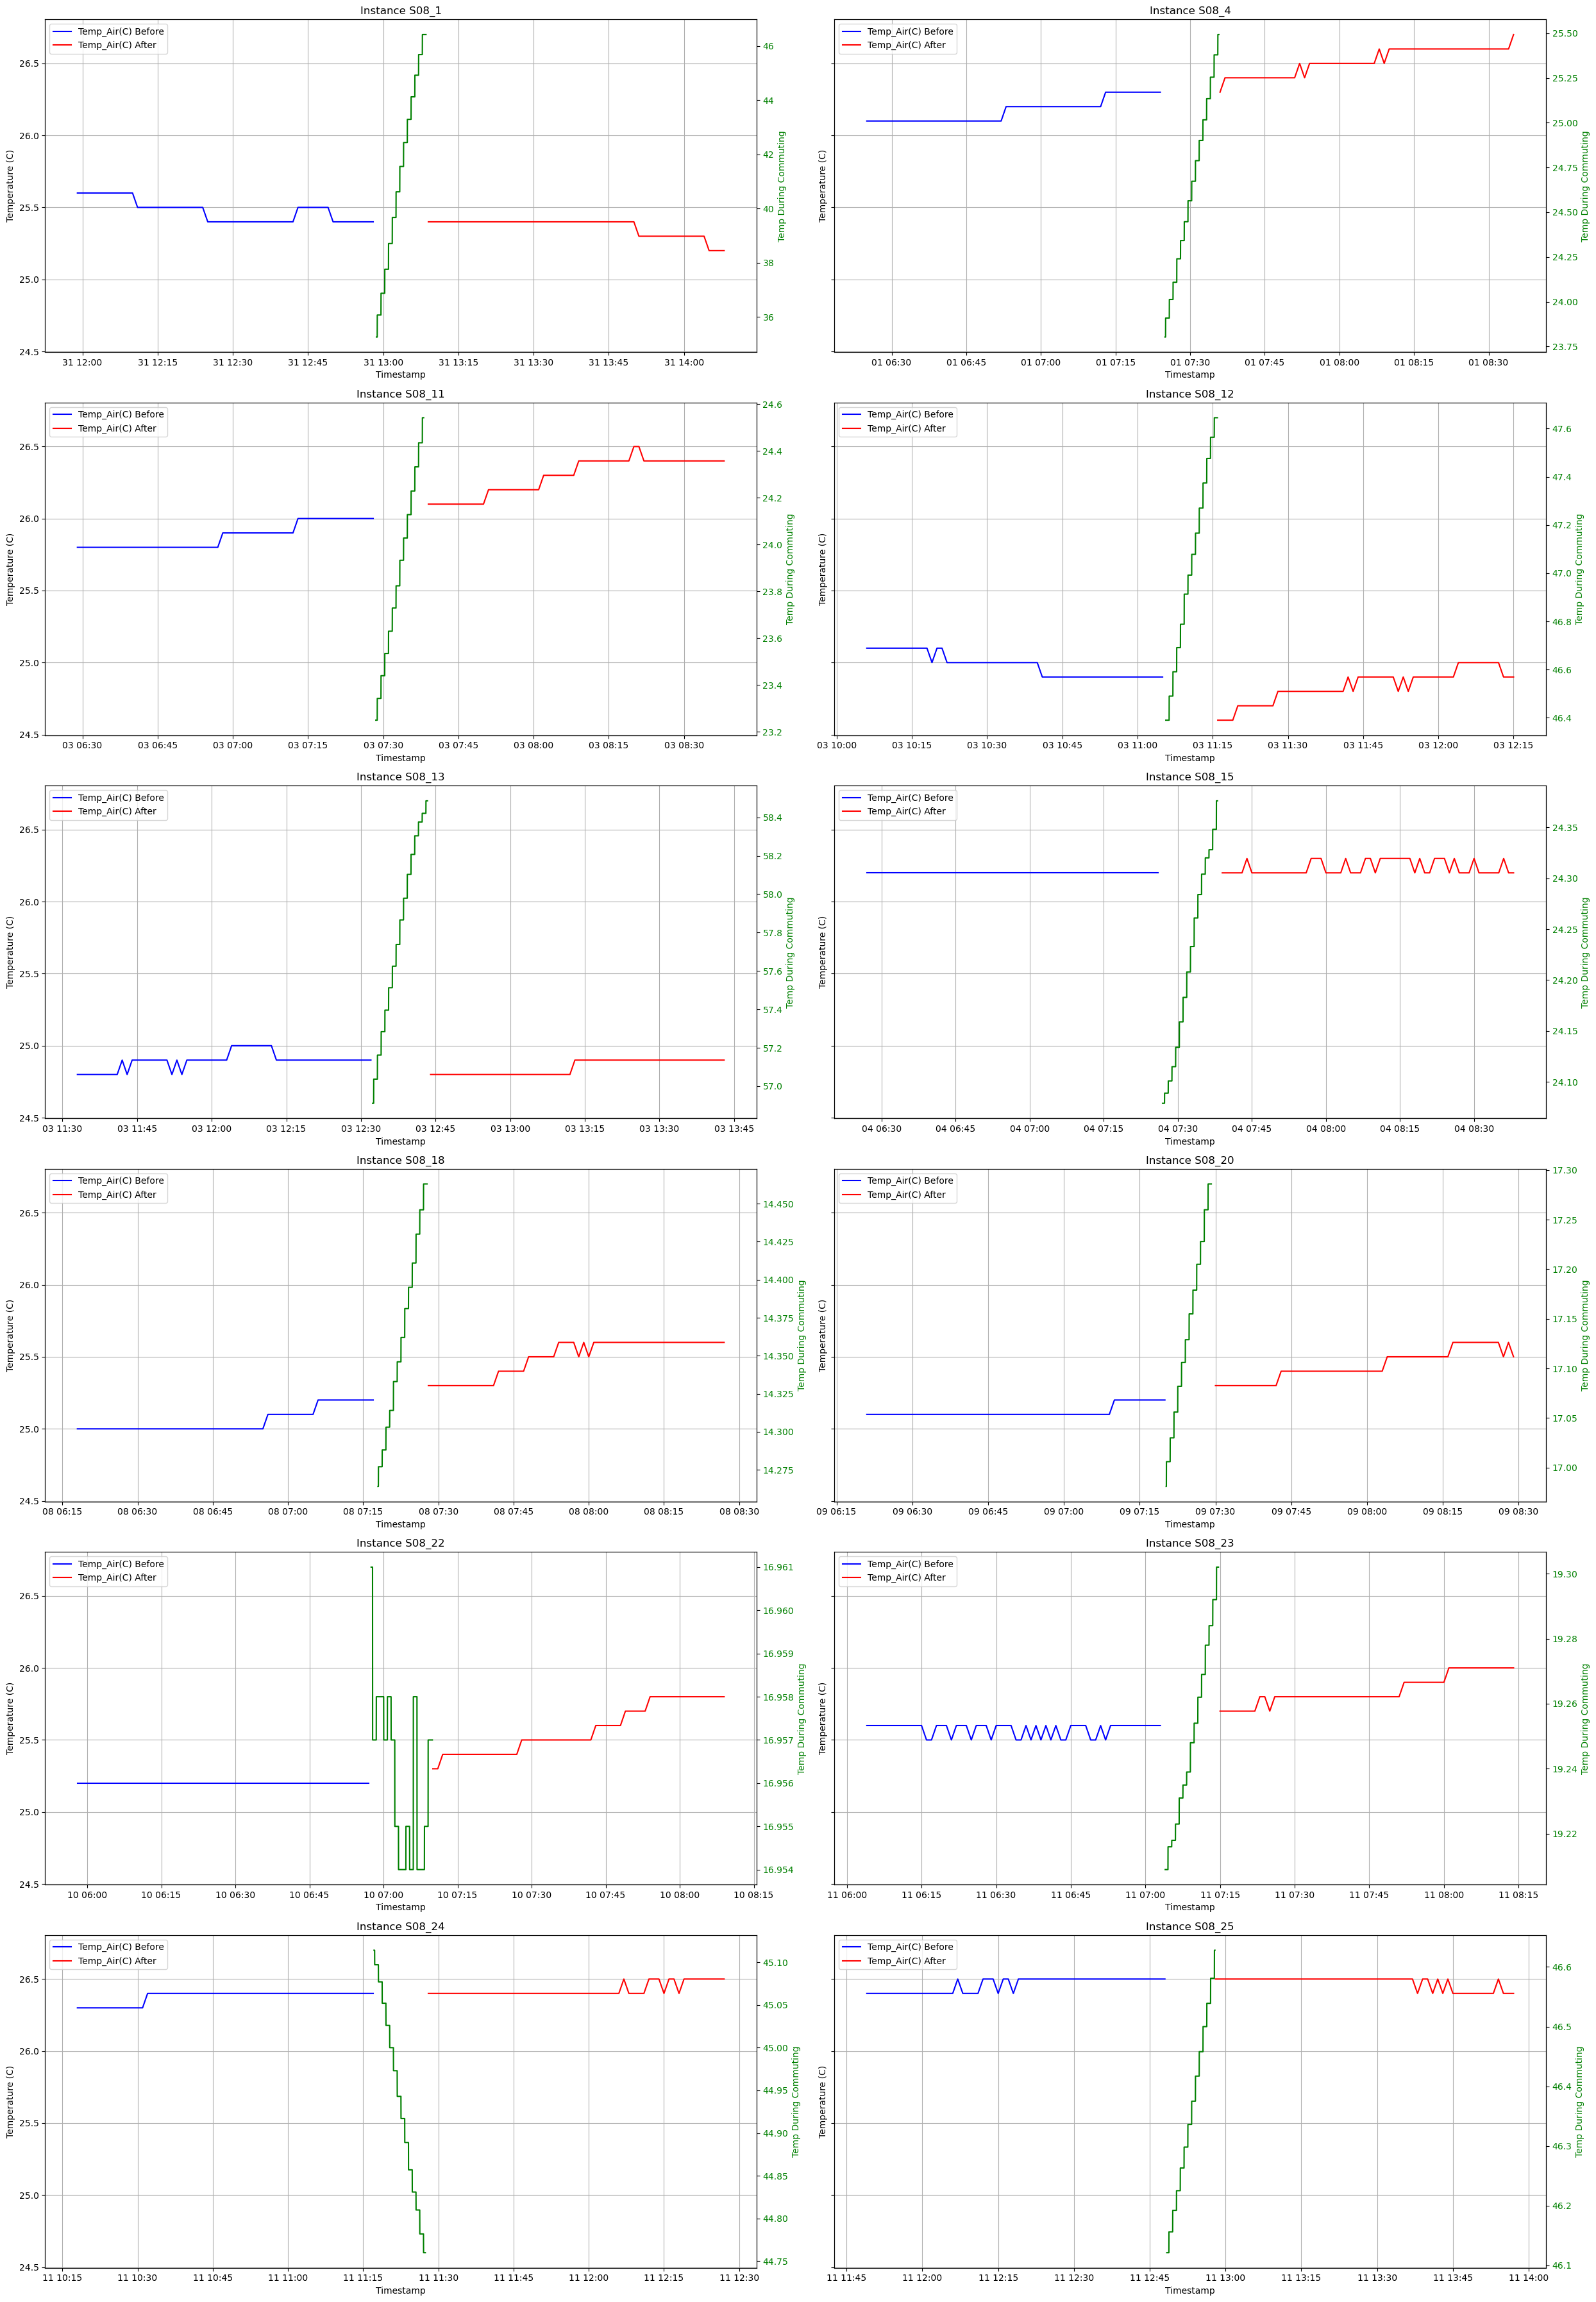

In [34]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'

data = pd.read_csv(data_file_path)
commuting_data = S08_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S08_1", "Start Time": "2023-07-31 12:58:39", "End Time": "2023-07-31 13:08:32"},
    {"ID_instance": "S08_4", "Start Time": "2023-08-01 07:24:57", "End Time": "2023-08-01 07:35:46"},
    {"ID_instance": "S08_11", "Start Time": "2023-08-03 07:28:31", "End Time": "2023-08-03 07:38:04"},
    {"ID_instance": "S08_12", "Start Time": "2023-08-03 11:05:38", "End Time": "2023-08-03 11:15:56"},
    {"ID_instance": "S08_13", "Start Time": "2023-08-03 12:32:20", "End Time": "2023-08-03 12:43:22"},
    {"ID_instance": "S08_15", "Start Time": "2023-08-04 07:26:54", "End Time": "2023-08-04 07:38:02"},
    {"ID_instance": "S08_18", "Start Time": "2023-08-08 07:17:57", "End Time": "2023-08-08 07:27:45"},
    {"ID_instance": "S08_20", "Start Time": "2023-08-09 07:20:15", "End Time": "2023-08-09 07:29:11"},
    {"ID_instance": "S08_22", "Start Time": "2023-08-10 06:57:30", "End Time": "2023-08-10 07:09:54"},
    {"ID_instance": "S08_23", "Start Time": "2023-08-11 07:03:59", "End Time": "2023-08-11 07:14:41"},
    {"ID_instance": "S08_24", "Start Time": "2023-08-11 11:17:10", "End Time": "2023-08-11 11:27:24"},
    {"ID_instance": "S08_25", "Start Time": "2023-08-11 12:48:22", "End Time": "2023-08-11 12:57:54"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data['Timestamp'], during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


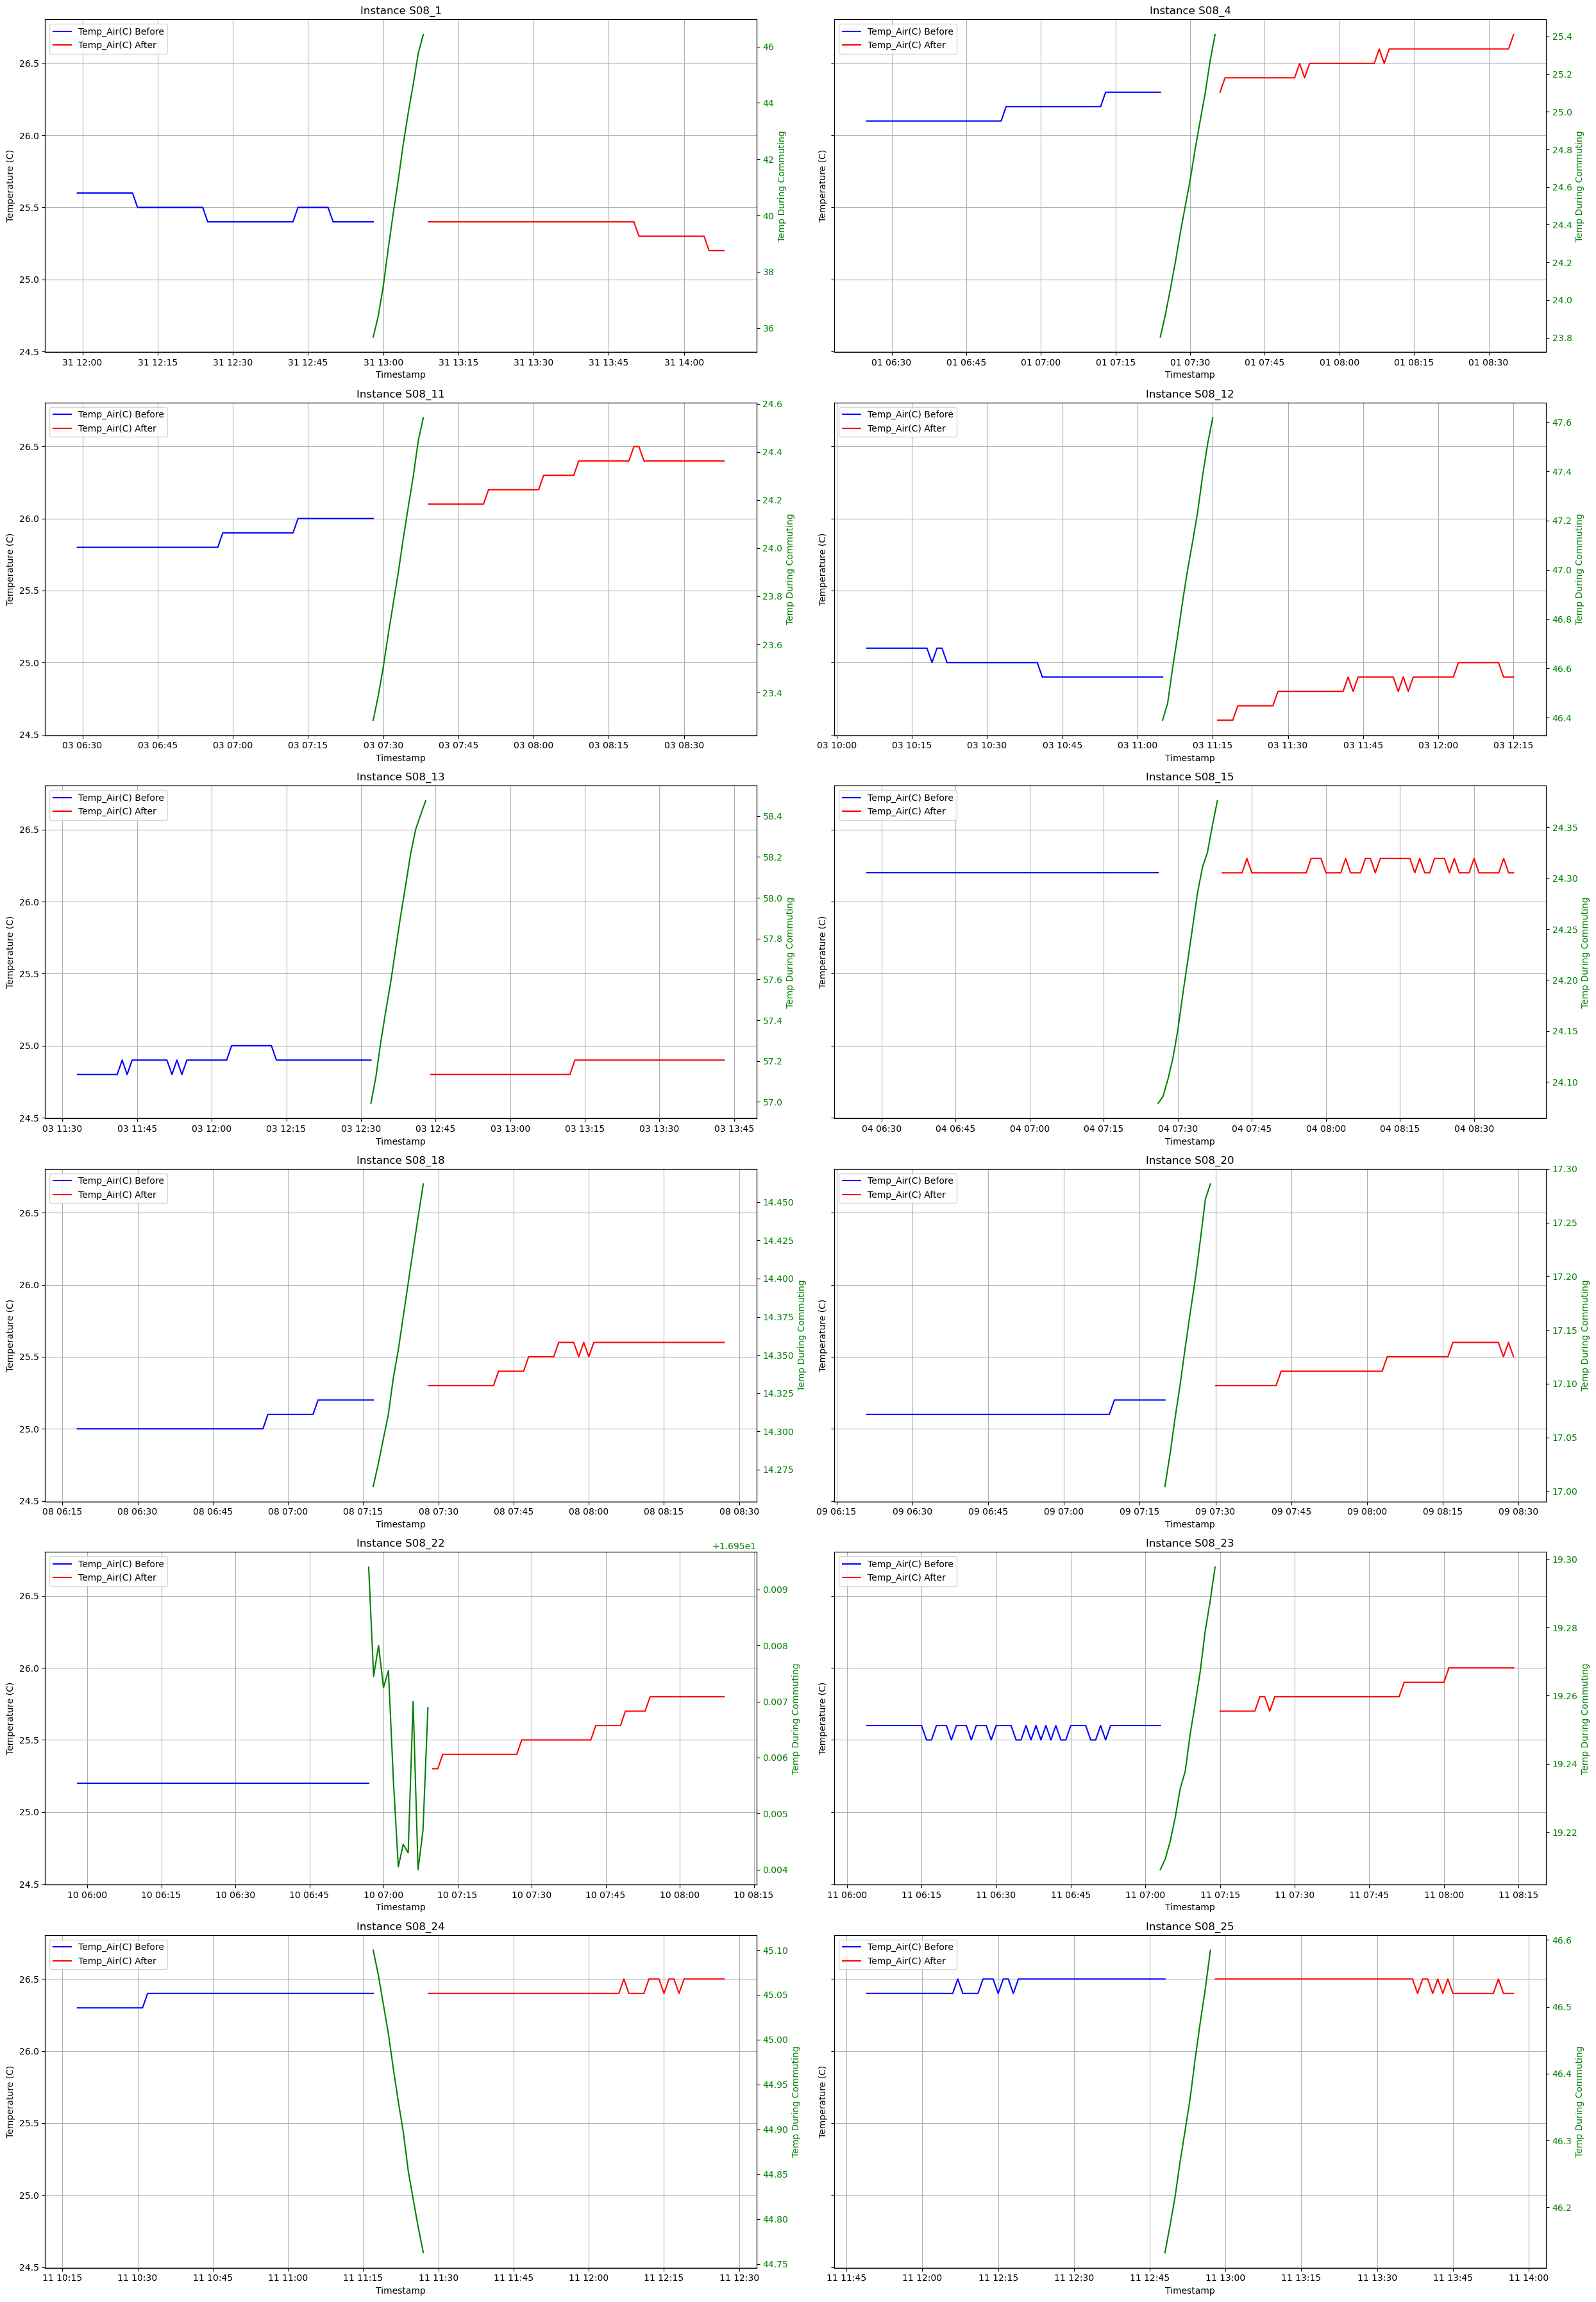

In [36]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'

data = pd.read_csv(data_file_path)
commuting_data = S08_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S08_1", "Start Time": "2023-07-31 12:58:39", "End Time": "2023-07-31 13:08:32"},
    {"ID_instance": "S08_4", "Start Time": "2023-08-01 07:24:57", "End Time": "2023-08-01 07:35:46"},
    {"ID_instance": "S08_11", "Start Time": "2023-08-03 07:28:31", "End Time": "2023-08-03 07:38:04"},
    {"ID_instance": "S08_12", "Start Time": "2023-08-03 11:05:38", "End Time": "2023-08-03 11:15:56"},
    {"ID_instance": "S08_13", "Start Time": "2023-08-03 12:32:20", "End Time": "2023-08-03 12:43:22"},
    {"ID_instance": "S08_15", "Start Time": "2023-08-04 07:26:54", "End Time": "2023-08-04 07:38:02"},
    {"ID_instance": "S08_18", "Start Time": "2023-08-08 07:17:57", "End Time": "2023-08-08 07:27:45"},
    {"ID_instance": "S08_20", "Start Time": "2023-08-09 07:20:15", "End Time": "2023-08-09 07:29:11"},
    {"ID_instance": "S08_22", "Start Time": "2023-08-10 06:57:30", "End Time": "2023-08-10 07:09:54"},
    {"ID_instance": "S08_23", "Start Time": "2023-08-11 07:03:59", "End Time": "2023-08-11 07:14:41"},
    {"ID_instance": "S08_24", "Start Time": "2023-08-11 11:17:10", "End Time": "2023-08-11 11:27:24"},
    {"ID_instance": "S08_25", "Start Time": "2023-08-11 12:48:22", "End Time": "2023-08-11 12:57:54"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data.index, before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data.index, after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


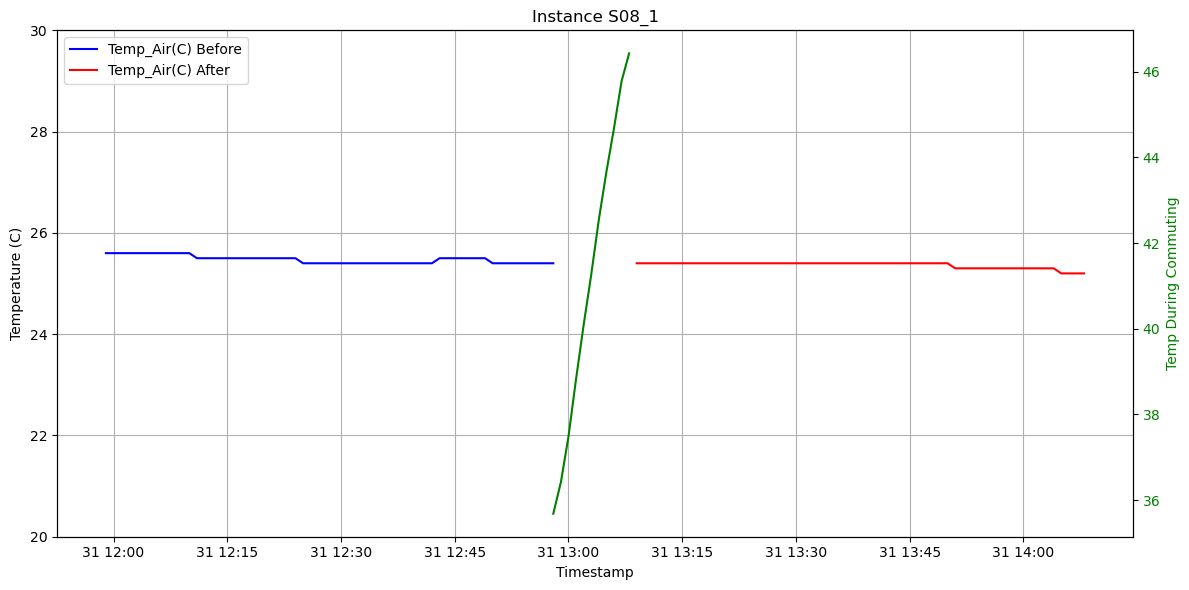

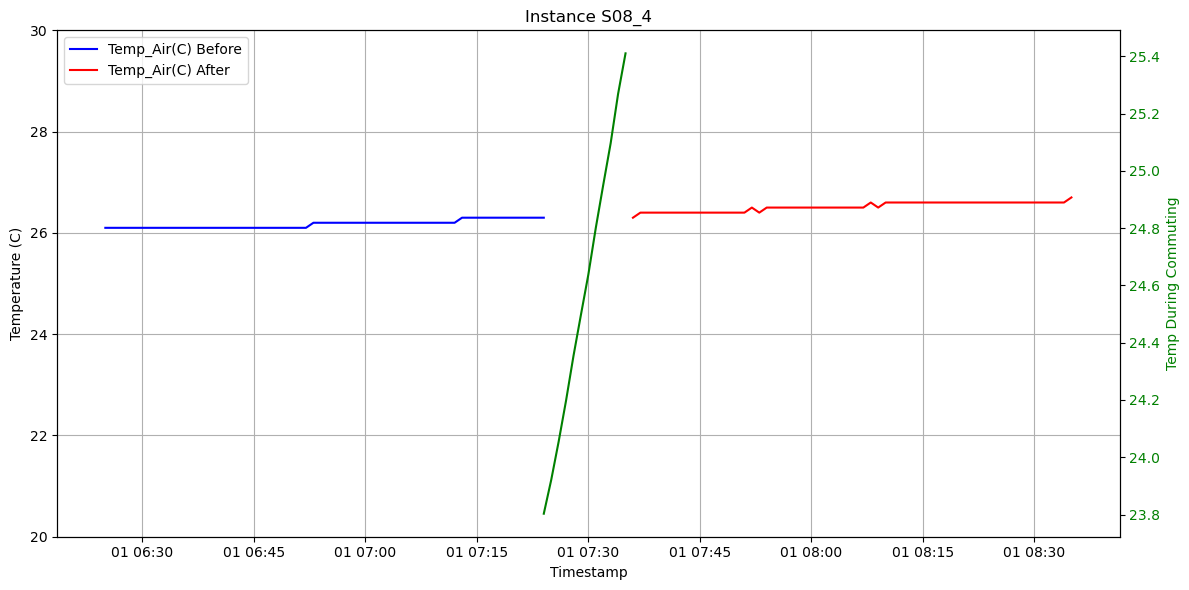

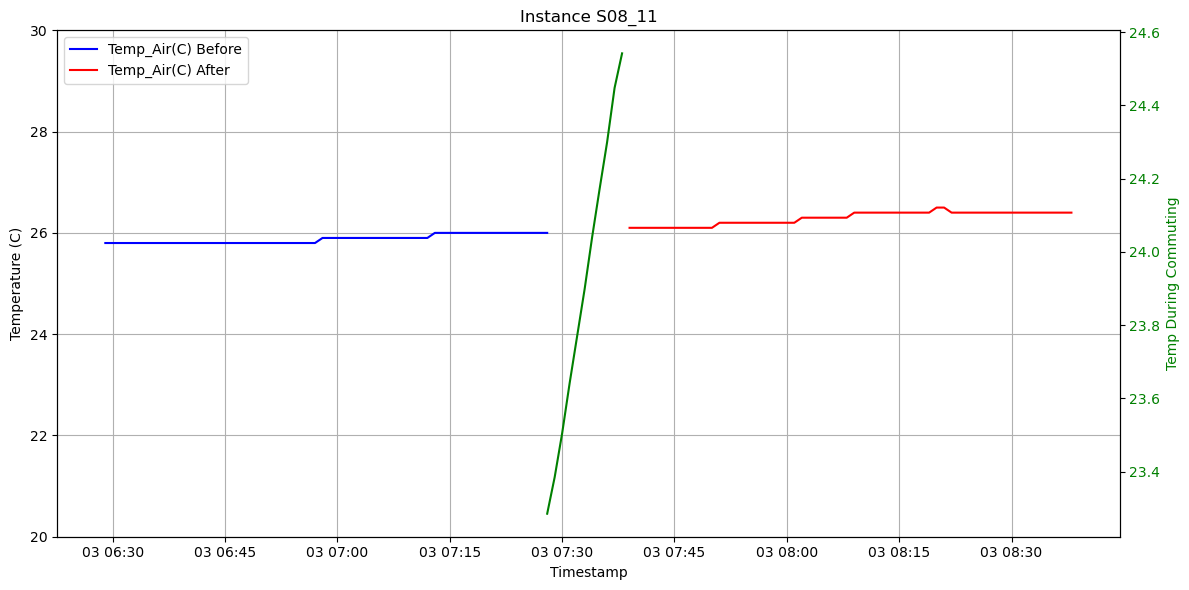

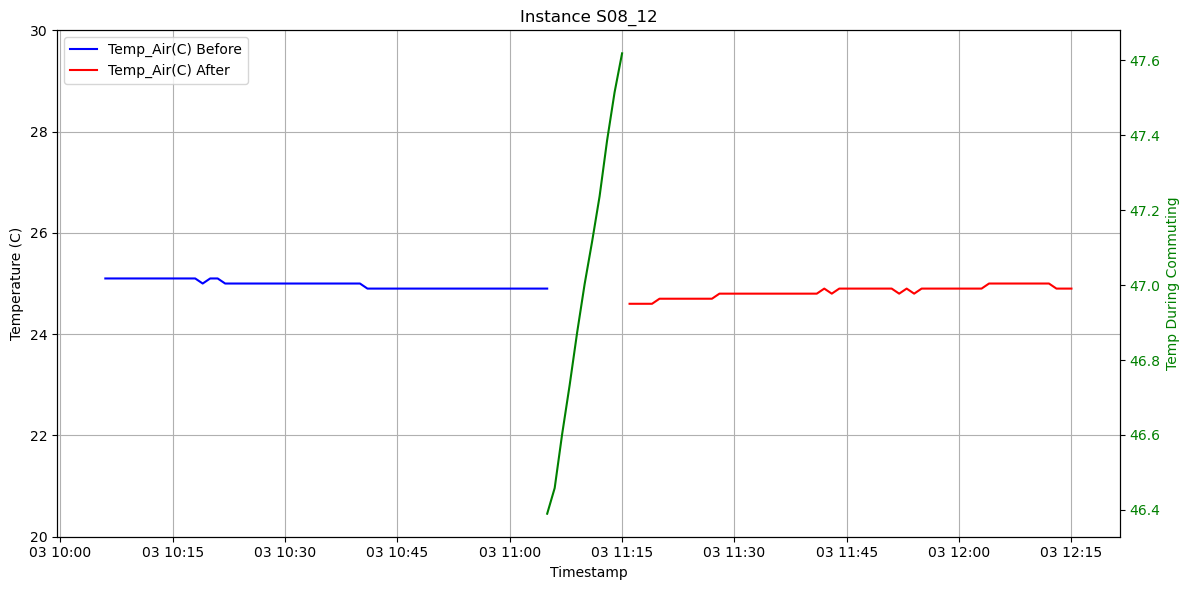

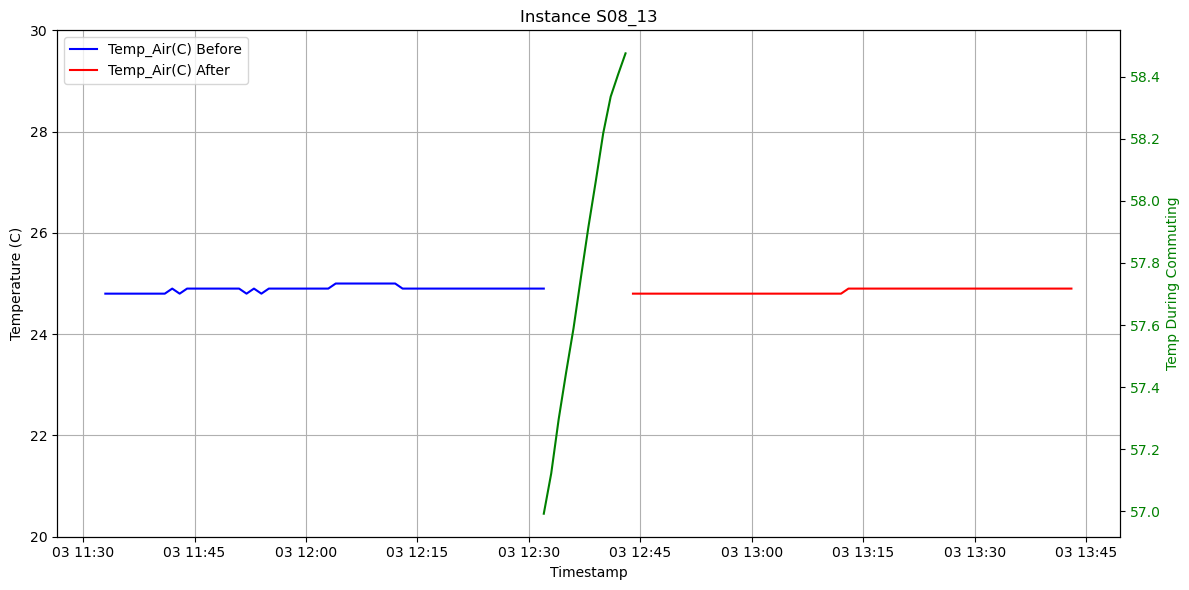

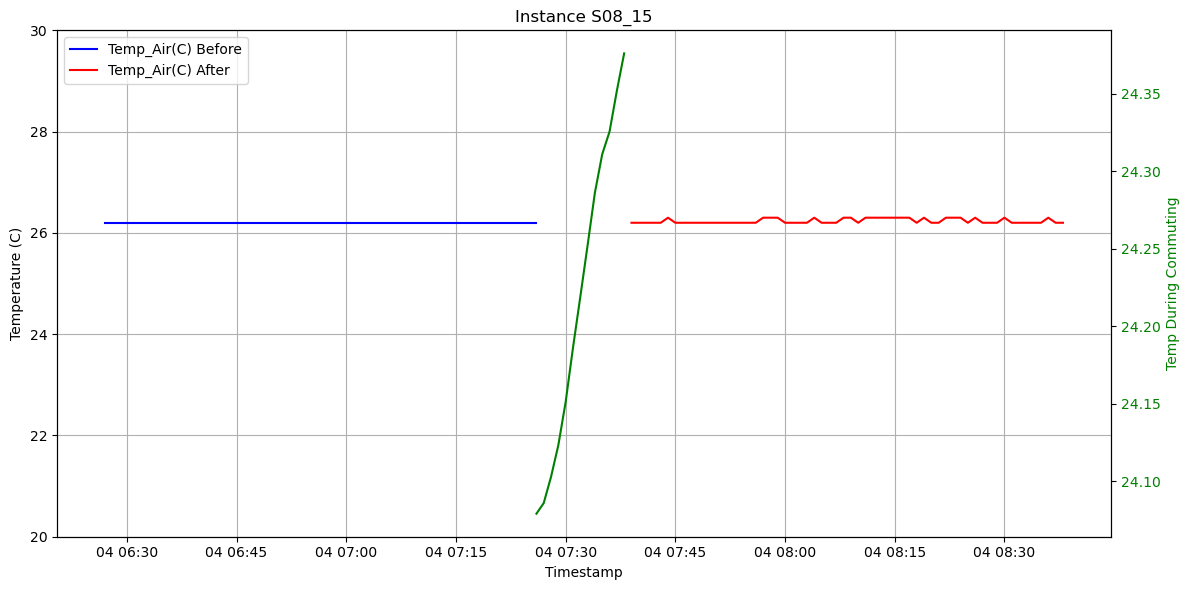

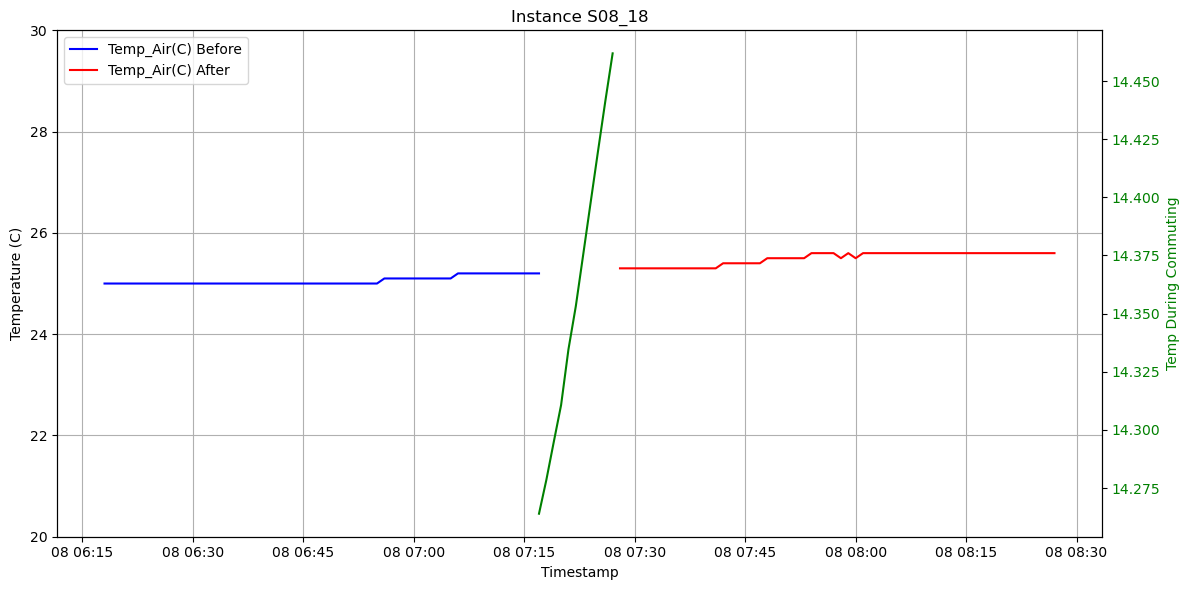

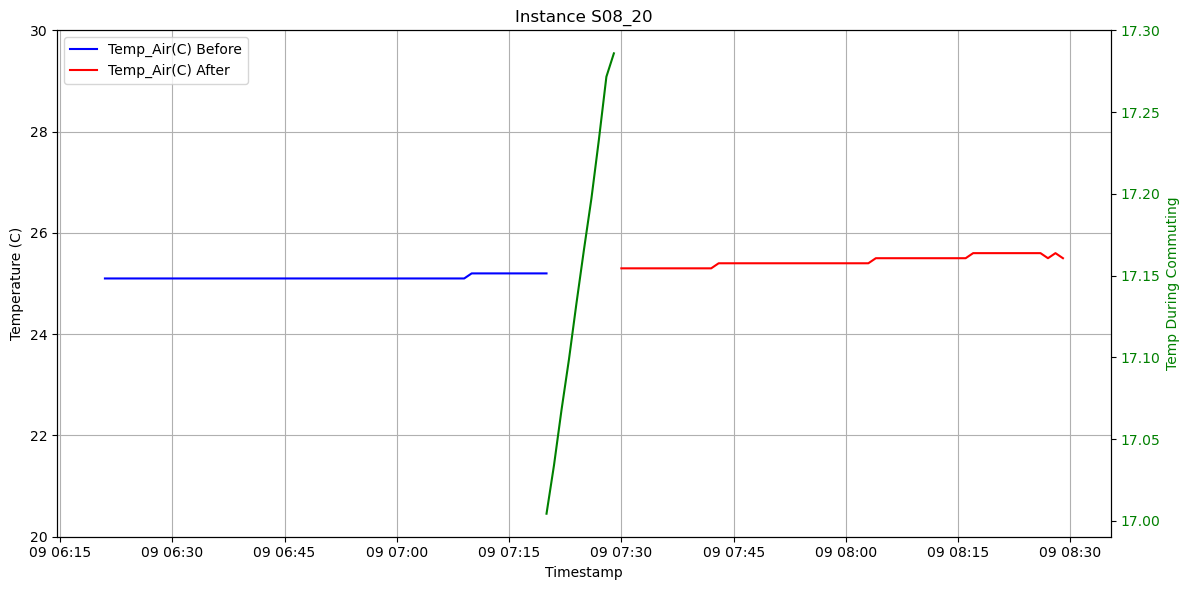

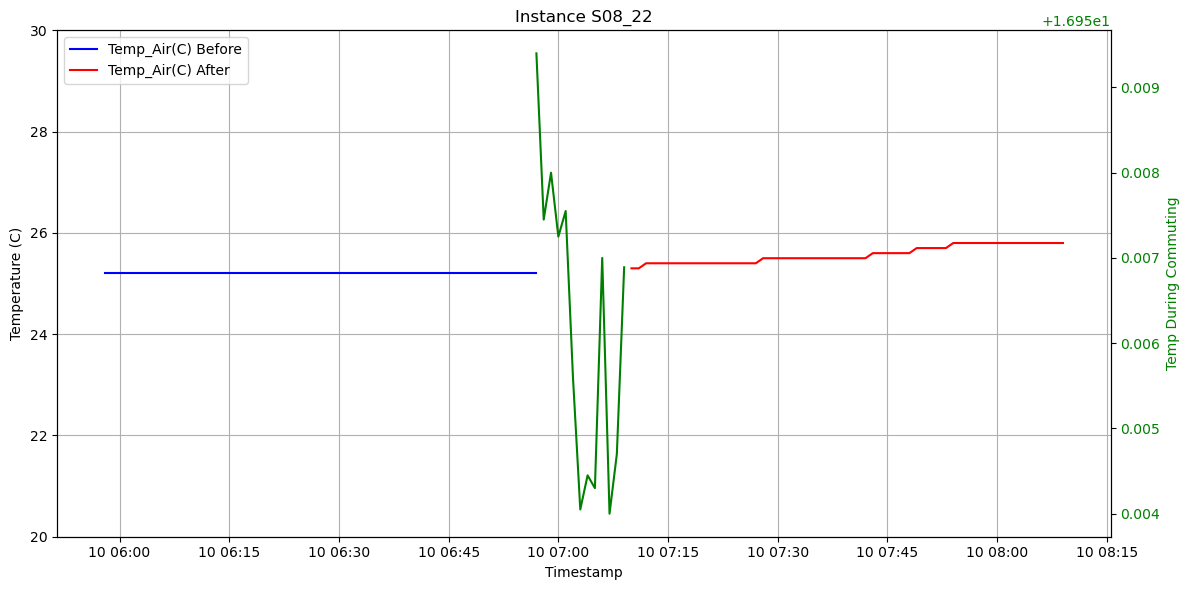

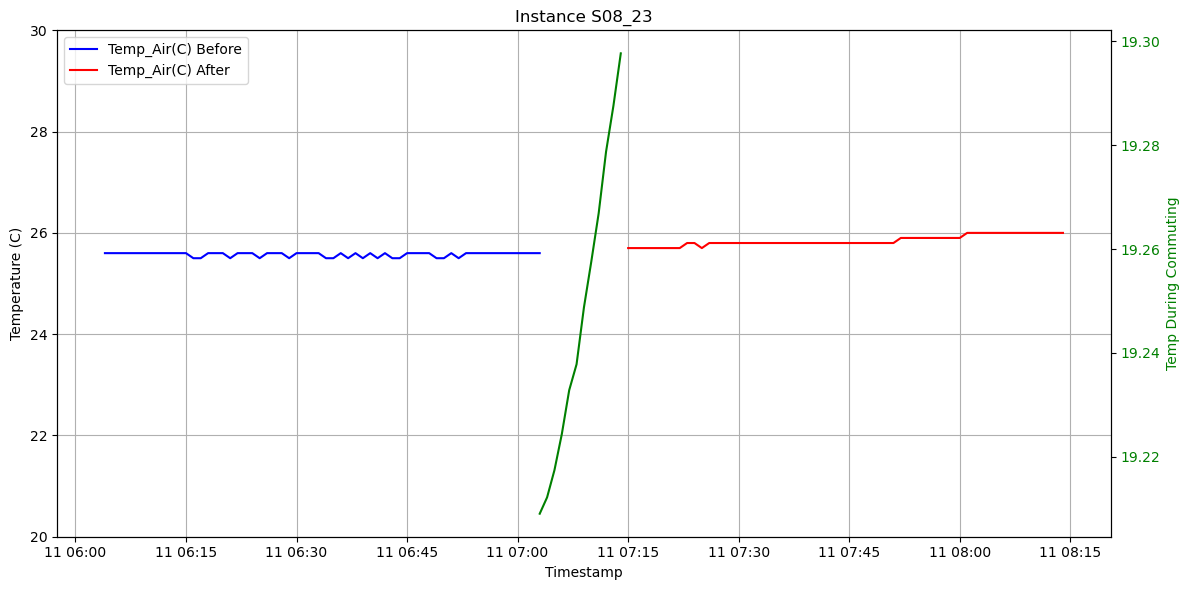

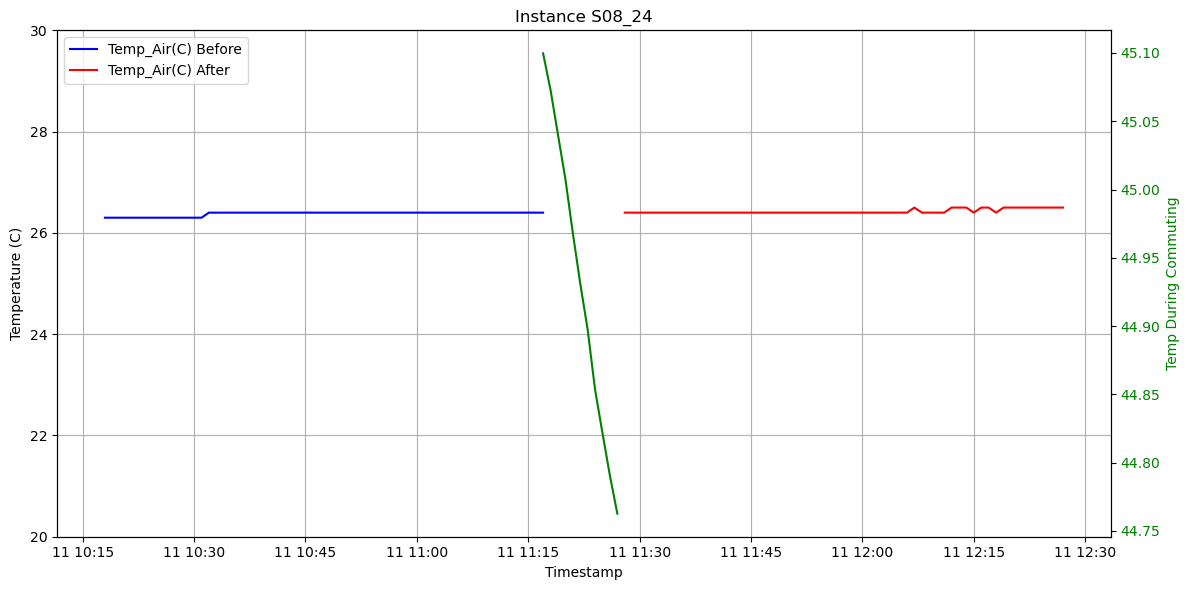

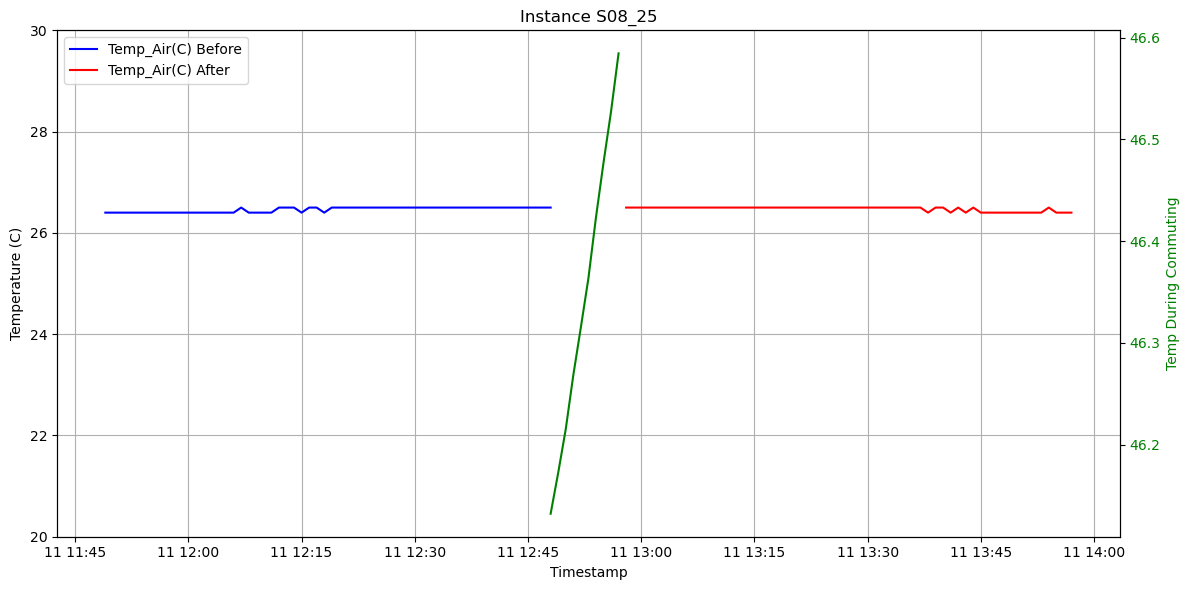

In [45]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'

data = pd.read_csv(data_file_path)
commuting_data = S08_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S08_1", "Start Time": "2023-07-31 12:58:39", "End Time": "2023-07-31 13:08:32"},
    {"ID_instance": "S08_4", "Start Time": "2023-08-01 07:24:57", "End Time": "2023-08-01 07:35:46"},
    {"ID_instance": "S08_11", "Start Time": "2023-08-03 07:28:31", "End Time": "2023-08-03 07:38:04"},
    {"ID_instance": "S08_12", "Start Time": "2023-08-03 11:05:38", "End Time": "2023-08-03 11:15:56"},
    {"ID_instance": "S08_13", "Start Time": "2023-08-03 12:32:20", "End Time": "2023-08-03 12:43:22"},
    {"ID_instance": "S08_15", "Start Time": "2023-08-04 07:26:54", "End Time": "2023-08-04 07:38:02"},
    {"ID_instance": "S08_18", "Start Time": "2023-08-08 07:17:57", "End Time": "2023-08-08 07:27:45"},
    {"ID_instance": "S08_20", "Start Time": "2023-08-09 07:20:15", "End Time": "2023-08-09 07:29:11"},
    {"ID_instance": "S08_22", "Start Time": "2023-08-10 06:57:30", "End Time": "2023-08-10 07:09:54"},
    {"ID_instance": "S08_23", "Start Time": "2023-08-11 07:03:59", "End Time": "2023-08-11 07:14:41"},
    {"ID_instance": "S08_24", "Start Time": "2023-08-11 11:17:10", "End Time": "2023-08-11 11:27:24"},
    {"ID_instance": "S08_25", "Start Time": "2023-08-11 12:48:22", "End Time": "2023-08-11 12:57:54"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Define y-axis limits for consistency
primary_y_axis_limits = (20, 30)

# Function to plot temperature data before, during, and after for each instance
def plot_temperatures_full(commuting_instances, data, commuting_data):
    for instance in commuting_instances:
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(before_data.index, before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data.index, after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        # Set consistent y-axis limits for the primary y-axis
        ax.set_ylim(primary_y_axis_limits)

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)
